<a href="https://colab.research.google.com/github/bala-codes/Sentiment_Analysis_on_Amazon_Product_Reviews_Using_Machine_and_Deep_Learning/blob/master/codes%20(DL%20-%20RNN%20%26%20LSTM)/Part-3.1%20Sentiment%20Analysis%20-%20Prediction%20-%20Long%20Short%20Term%20Memory%20-%20GLOVE%20EMBEDDING%20-%20Single%20Input%20Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Importing the libraries which are required.
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pickle
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('wordnet')
from keras.models import model_from_json

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Using TensorFlow backend.


In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

'''def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words'''

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])
    
def text_cleaner(raw):
    cleaned_text = (punc_remover(raw.lower()))
    return lem(cleaned_text.lower())

def plot_preds1(val1, val2):
  class_labels = ['POSITIVE', 'NEGATIVE']
  j = [val1, val2]
  y_pos = np.arange(len(class_labels))
  colors = ['g','r']
  plt.barh(y_pos,j, color = colors, alpha = 0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING POSITIVE VS NEGATIVE SENTIMENTS')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()


def plot_preds2(val1, val2):
  class_labels = ['NEGATIVE','POSITIVE']
  j = [val1, val2]
  y_pos = np.arange(len(class_labels))
  colors = ['g', 'r']
  plt.barh(y_pos,j, color = colors, alpha = 0.6)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING POSITIVE VS NEGATIVE SENTIMENTS')
  plt.xlabel('Percentage')
  plt.ylabel('Labels')
  plt.show()

In [ ]:
# Use the below function to load the Saved Tokenizer
with open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Glove Embedding/LSTM_tokenizer_GLOVE.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences
maxlen = 300

# nn_emb_model = tf.keras.models.load_model('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Keras Embeddings/SENTIMENT_ANALYSIS_LSTM_KERAS_EMBED_MODEL.h5') 
json_file = open('/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Glove Embedding/LSTM_sentiment_GLOVE.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 3 -SOURCE CODES AND FILES/Pretrained Models/Deep Learning Models - With Glove Embedding/LSTM_sentiment_GLOVE.h5")
print("Loaded model from disk successfully")


def prediction(x):
  process1 = tokenizer.texts_to_sequences(x)
  #print("P1",process1)
  process2 = pad_sequences(process1, padding='post', maxlen=maxlen)
  #print("P3",process2)
  prediction = loaded_model.predict(process2)
  prediction = np.squeeze(prediction)
  val1 = np.squeeze(prediction)
  val2 = 1 - np.squeeze(prediction)

  value1 = "The Given Review is a Positive Sentiment"
  value0 = "The Given Review is a Negative Sentiment"
  if prediction >= 0.5:
    plot_preds1(val1 , val2)
    return value1
  else:
    plot_preds1(val1 , val2)
    return value0

Loaded model from disk successfully


ENTER THE URL HERE :  I thought the product will be bad, but I am not disappointed
i think the product will be bad but i be not disappoint


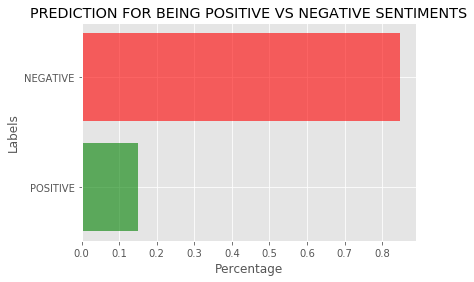



 The Given Review is a Negative Sentiment


In [ ]:
x = input("ENTER THE URL HERE : ") 
x = text_cleaner(x)
print(x)
x=[x,]
print("\n\n",prediction(x))